# FFT Y FILTROS CON AUDIO

In [7]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa   # por instalar 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/rec_NOTA.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal

L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo

display(Audio(Audio_m, rate= Fs))



135936


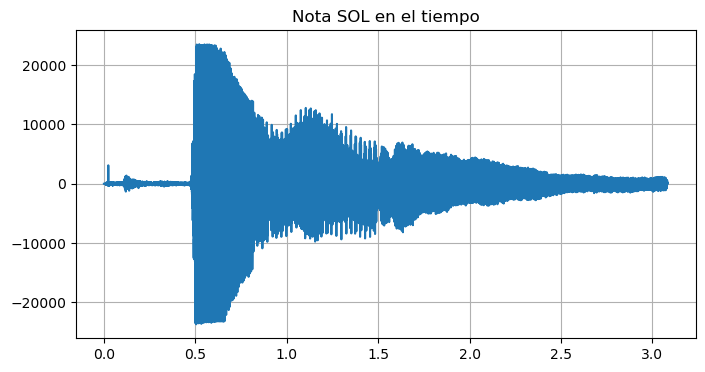

In [15]:
plt.figure(figsize=(8,4))
plt.plot(n,Audio_m)
plt.title('Nota SOL en el tiempo')
plt.grid(True)
plt.show()

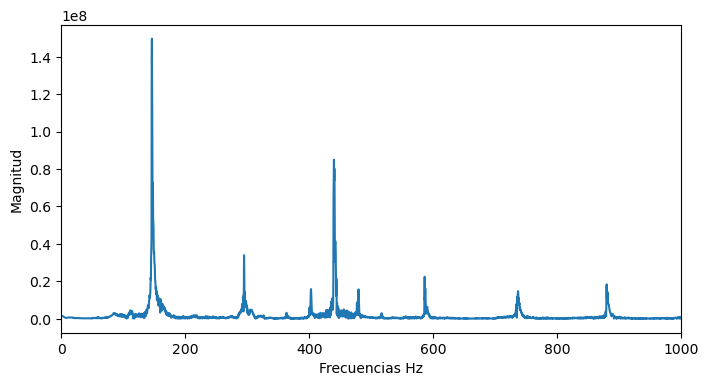

In [16]:
fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 

plt.figure(figsize=(8,4))
plt.plot(F,M_fft)
plt.xlim(0,1000)
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias Hz')
plt.show()


In [17]:
Posm = np.where(M_fft==np.max(M_fft)) 
F_p = F[Posm]

print(f'La frecuencia central es: {F_p}')

La frecuencia central es: [145.9878178]


# Grabar desde el microfono

In [18]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa   # por instalar 
import numpy as np
import matplotlib.pyplot as plt
import wave

# --- CONFIGURACIÓN ---
FRAMES = 1024       # resolucion sonido
FORMAT = pa.paInt16  # enteros de 16 bits
CHANNELS = 1    
Fs = 44100
segundos = 5

filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_1.wav'


p = pa.PyAudio()

print("Inicio de grabacion")


stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate = Fs,
    input= True,
    frames_per_buffer= FRAMES
)

frames_totales = []

# Calculamos cuántos paquetes leer para completar 5 segundos
for i in range(0, int(Fs / FRAMES * segundos)):
    data = stream.read(FRAMES)
    frames_totales.append(data)

print("Grabación finalizada.")

# Detener y cerrar stream
stream.stop_stream()
stream.close()
p.terminate()

# --- GUARDAR ARCHIVO .WAV ---
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(Fs)
wf.writeframes(b''.join(frames_totales))
wf.close()
print(f"Archivo guardado como: {filename}")



In [ ]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa   # por instalar 
import numpy as np
import matplotlib.pyplot as plt
import wave

# --- CONFIGURACIÓN ---
FRAMES = 1024       # resolucion sonido
FORMAT = pa.paInt16  # enteros de 16 bits
CHANNELS = 1    
Fs = 44100
segundos = 5

filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_2.wav'


p = pa.PyAudio()

print("Inicio de grabacion")


stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate = Fs,
    input= True,
    frames_per_buffer= FRAMES
)

frames_totales = []

# Calculamos cuántos paquetes leer para completar 5 segundos
for i in range(0, int(Fs / FRAMES * segundos)):
    data = stream.read(FRAMES)
    frames_totales.append(data)

print("Grabación finalizada.")

# Detener y cerrar stream
stream.stop_stream()
stream.close()
p.terminate()

# --- GUARDAR ARCHIVO .WAV ---
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(Fs)
wf.writeframes(b''.join(frames_totales))
wf.close()
print(f"Archivo guardado como: {filename}")


## Procesar señal de audio desde el micrófono

132096


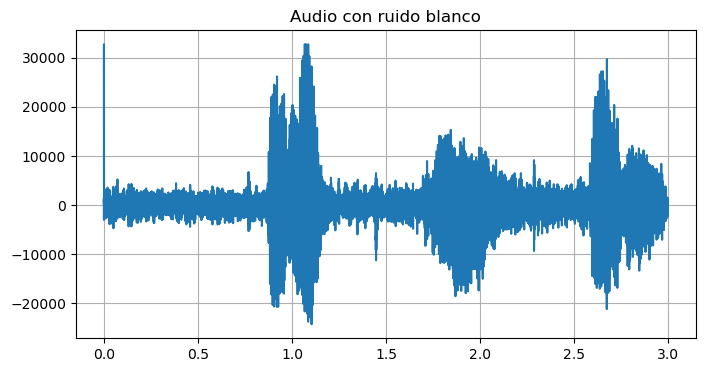

In [3]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa   # por instalar 
import numpy as np
import matplotlib.pyplot as plt

filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_1.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal

L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo

display(Audio(Audio_m, rate= Fs))

plt.figure(figsize=(8,4))
plt.plot(n,Audio_m)
plt.title('Audio con ruido blanco')
plt.grid(True)
plt.show()



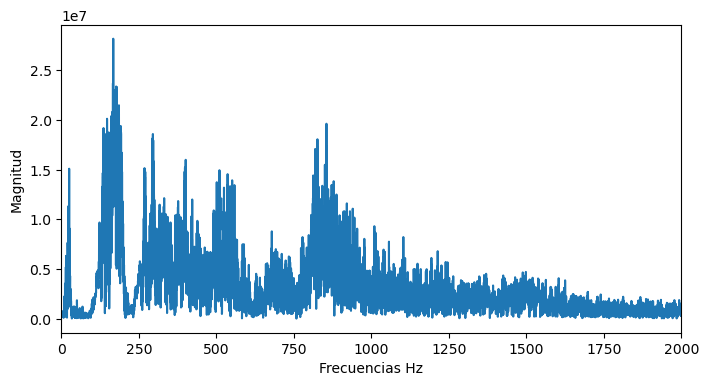

In [7]:
fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 

plt.figure(figsize=(8,4))
plt.plot(F,M_fft)
plt.xlim(0,2000)
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias Hz')
plt.show()

In [8]:
Posm = np.where(M_fft==np.max(M_fft)) 
F_p = F[Posm]

print(f'La frecuencia central es: {F_p}')

La frecuencia central es: [167.25790334]


## Filtro pasa bajo


In [9]:
filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_1.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal
L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo

fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 
frecuencias = np.fft.fftfreq(L,1/Fs) #  Frecuencias en mi archivo de audio

# filtro pasa bajos
fc = 400

# mascara para frecuencias menores a fc: 1 y 0
filtro_mask = np.abs(frecuencias) < fc

# aplicar el filtro
X_filtrado = fft * filtro_mask 

# Dominio del tiempo

audio_filtrado = np.fft.ifft(X_filtrado)
audio_filtrado = np.real(audio_filtrado)

# Guardar el nuevo archivo
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_pb_400.wav'
waves.write(ruta,Fs,audio_filtrado.astype(np.int16))

132096


132096


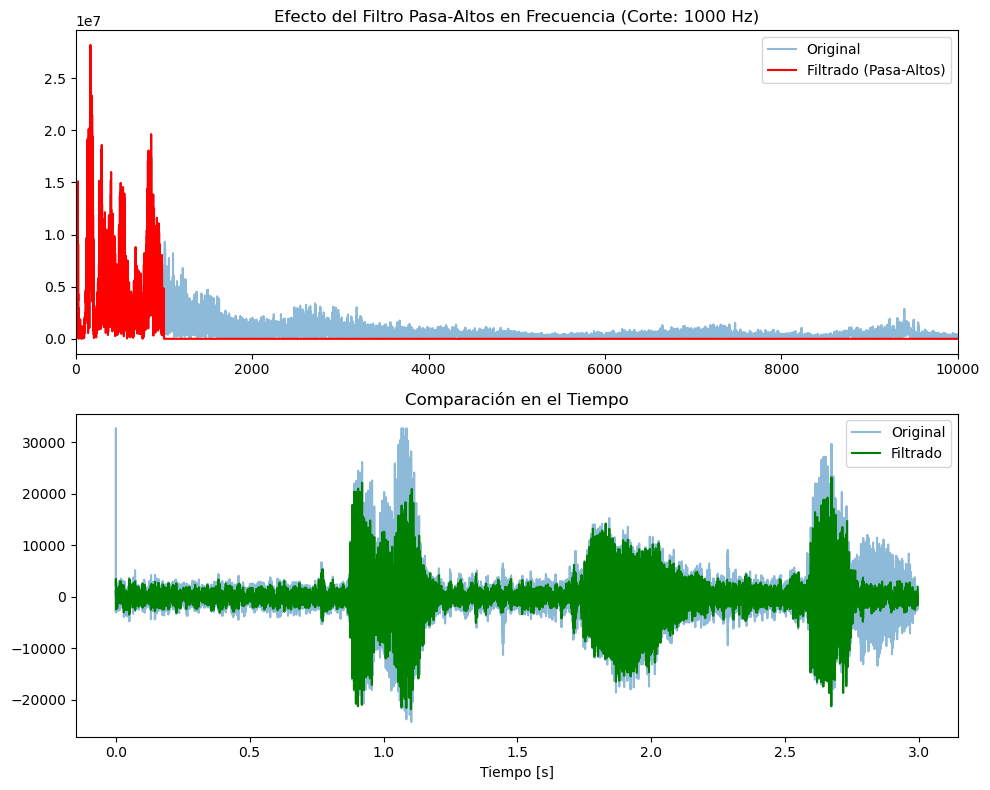

In [25]:
filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_1.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal
L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo

fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 
frecuencias = np.fft.fftfreq(L,1/Fs) #  Frecuencias en mi archivo de audio

# filtro pasa bajos
fc = 1000

# mascara para frecuencias menores a fc: 1 y 0
filtro_mask = np.abs(frecuencias) < fc

# aplicar el filtro
X_filtrado = fft * filtro_mask 

# Dominio del tiempo

audio_filtrado = np.fft.ifft(X_filtrado)
audio_filtrado = np.real(audio_filtrado)

# Guardar el nuevo archivo
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_pb_1000.wav'
waves.write(ruta,Fs,audio_filtrado.astype(np.int16))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(X_filtrado[:L//2]), label="Filtrado (Pasa-Altos)", color='r')
ax1.set_title(f"Efecto del Filtro Pasa-Altos en Frecuencia (Corte: {fc} Hz)")
ax1.set_xlim(0, 10000)
ax1.legend()

# Señal en el tiempo
ax2.plot(n, Audio_m, label="Original", alpha=0.5)
ax2.plot(n, audio_filtrado, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.legend()

plt.tight_layout()
plt.show()

## Pasa alto

132096


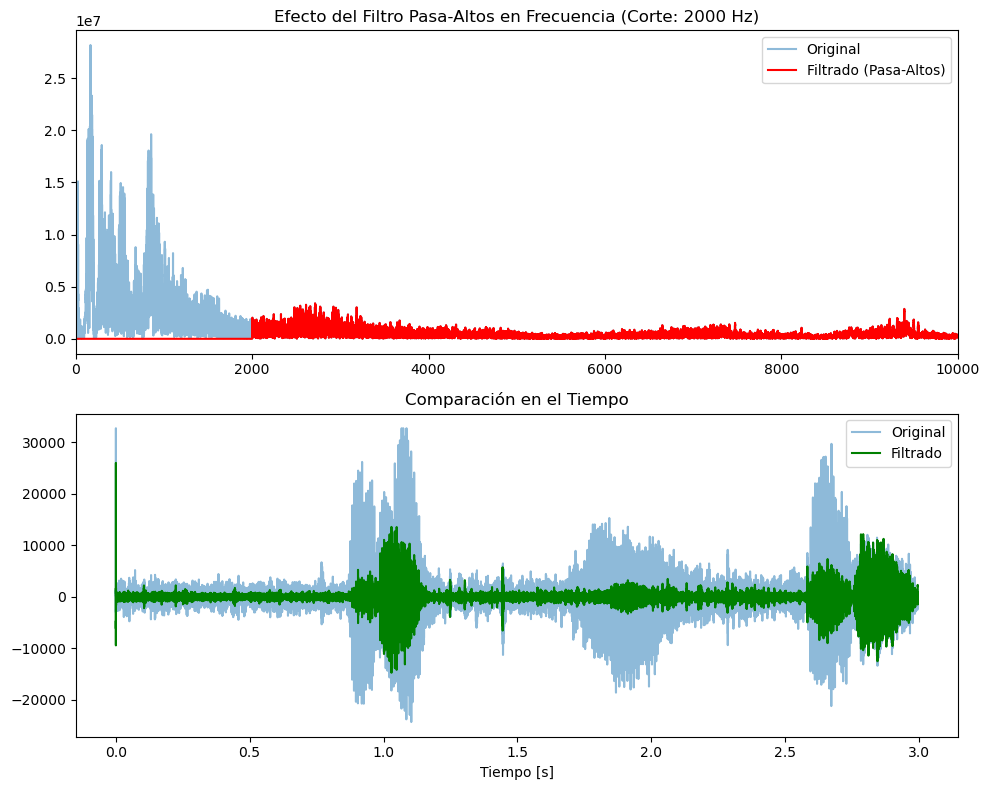

In [26]:
filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_1.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal
L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo

fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 
frecuencias = np.fft.fftfreq(L,1/Fs) #  Frecuencias en mi archivo de audio

# filtro pasa bajos
fc = 2000

# mascara para frecuencias menores a fc: 1 y 0
filtro_mask = np.abs(frecuencias) > fc

# aplicar el filtro
X_filtrado = fft * filtro_mask 

# Dominio del tiempo

audio_filtrado = np.fft.ifft(X_filtrado)
audio_filtrado = np.real(audio_filtrado)

# Guardar el nuevo archivo
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_pa_1000.wav'
waves.write(ruta,Fs,audio_filtrado.astype(np.int16))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(X_filtrado[:L//2]), label="Filtrado (Pasa-Altos)", color='r')
ax1.set_title(f"Efecto del Filtro Pasa-Altos en Frecuencia (Corte: {fc} Hz)")
ax1.set_xlim(0, 10000)
ax1.legend()

# Señal en el tiempo
ax2.plot(n, Audio_m, label="Original", alpha=0.5)
ax2.plot(n, audio_filtrado, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.legend()

plt.tight_layout()
plt.show()

## Pasa banda

132096


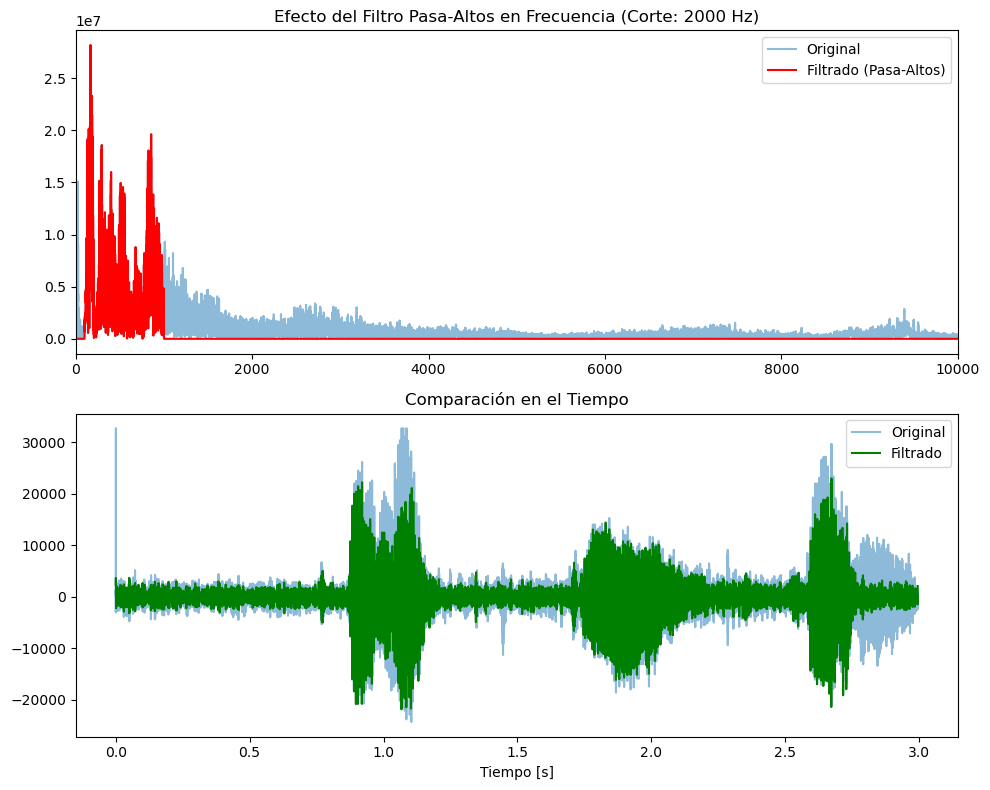

In [28]:
filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_1.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal
L = len(Audio_m)
print(L)
n = np.arange(0,L)/Fs # teorema de muestreo

fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 
frecuencias = np.fft.fftfreq(L,1/Fs) #  Frecuencias en mi archivo de audio

# --- Diseño del Filtro Pasa Banda (100Hz - 2000Hz) ---
fc_1 = 100
fc_2 = 1000

# Creamos una sola máscara que cumpla ambas condiciones
filtro_mask = (np.abs(frecuencias) >= fc_1) & (np.abs(frecuencias) <= fc_2)

# aplicar el filtro
X_filtrado = fft * filtro_mask 

# Dominio del tiempo

audio_filtrado = np.fft.ifft(X_filtrado)
audio_filtrado = np.real(audio_filtrado)

# Guardar el nuevo archivo
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/grabacion_pb.wav'
waves.write(ruta,Fs,audio_filtrado.astype(np.int16))


#  GRAFICAR
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(X_filtrado[:L//2]), label="Filtrado (Pasa-Altos)", color='r')
ax1.set_title(f"Efecto del Filtro Pasa-Altos en Frecuencia (Corte: {fc} Hz)")
ax1.set_xlim(0, 10000)
ax1.legend()

# Señal en el tiempo
ax2.plot(n, Audio_m, label="Original", alpha=0.5)
ax2.plot(n, audio_filtrado, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.legend()

plt.tight_layout()
plt.show()

## Filtro IIR

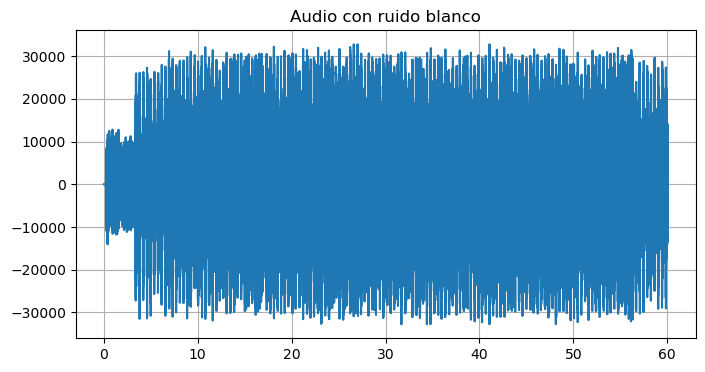

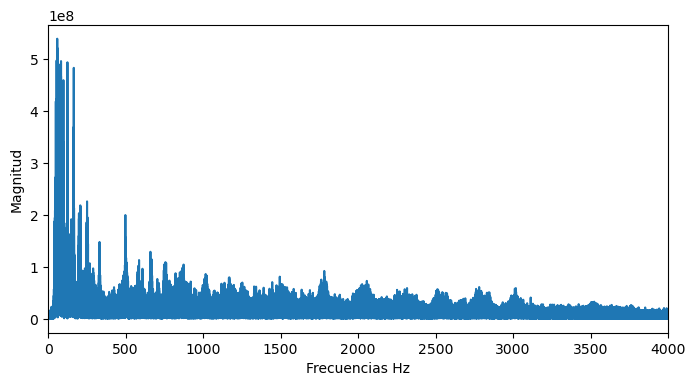

In [31]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa   # por instalar 
import numpy as np
import matplotlib.pyplot as plt

filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/Idles.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data


# tamaño de la señal
L = len(Audio_m)
n = np.arange(0,L)/Fs # teorema de muestreo

display(Audio(Audio_m, rate= Fs))
plt.figure(figsize=(8,4))
plt.plot(n,Audio_m)
plt.title('Audio con ruido blanco')
plt.grid(True)
plt.show()

fft = fourier.fft(Audio_m)   # realizar la FFT
M_fft = abs(fft)   # Magnitud de la señal
M_fft = M_fft[0:L//2]   # Mitad de los datos

F = Fs*np.arange(0,L//2)/L 
plt.figure(figsize=(8,4))
plt.plot(F,M_fft)
plt.xlim(0,4000)
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias Hz')
plt.show()

In [38]:
from scipy.signal import butter, lfilter
filename = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/Idles.wav'

Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data

data_norm = data /np.max(np.abs(data))
L = len(data_norm)
fft = np.fft.fft(data_norm)
frecuencias = np.fft.fftfreq(L,1/Fs)

def butter_lowpass(fc,fs,order=2): # order = 2-5
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b , a = butter(order, normal_fc, btype='low', analog=False)
    return b,a

def butter_highpass(fc,fs,order=2): # order = 2-5
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b , a = butter(order, normal_fc, btype='high', analog=False)
    return b,a  

def butter_bandpass(fc_1,fc_2,fs,order=2): # order = 2-5
    nyq = 0.5 * fs
    low = fc_1 / nyq
    high = fc_2 / nyq
    b , a = butter(order,[low,high], btype='band', analog=False)
    return b,a  



In [39]:
#### filtro pasa bajos
fc = 500.0
b,a = butter_lowpass(fc,Fs,order= 5)
# aplicar el filtro
audio_filtrado_iir = lfilter (b,a,data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_iir)
# escalar a 16 bits
audio_final = (audio_filtrado_iir*32767).astype(np.int16)
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/butter_lp_500.wav'
waves.write(ruta,Fs,audio_final)


In [ ]:
t = np.arange(L) / Fs

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Espectro original vs Filtrado
ax1.plot(frecuencias[:L//2], np.abs(fft[:L//2]), label="Original", alpha=0.5)
ax1.plot(frecuencias[:L//2], np.abs(fft_filtrada[:L//2]), label="Filtrado (Pasa-Banda)", color='r')
ax1.set_xlim(0, 10000) # Zoom a la zona de interés
ax1.set_ylabel("Magnitud")
ax1.legend()

# Señal en el tiempo
ax2.plot(t, data_norm, label="Original", alpha=0.5)
ax2.plot(t, audio_filtrado_iir, label="Filtrado", color='g')
ax2.set_title("Comparación en el Tiempo")
ax2.set_xlabel("Tiempo [s]")
ax2.set_ylabel("Amplitud")
ax2.legend()

In [40]:
#### filtro pasa bajos
fc_1 = 500.0
fc_2 = 2000.0
b,a = butter_bandpass(fc_1,fc_2,Fs,order= 3)
# aplicar el filtro
audio_filtrado_iir = lfilter (b,a,data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_iir)
# escalar a 16 bits
audio_final = (audio_filtrado_iir*32767).astype(np.int16)
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/butter_bp_500_2000.wav'
waves.write(ruta,Fs,audio_final)

## FIR

In [43]:
from scipy.signal import firwin, lfilter

def fir_lowpass (fc, fs,ntaps= 101):
    nyq = 0.5 * fs
    taps = firwin(ntaps,fc/nyq, pass_zero='lowpass',window='hamming')
    return taps

fc = 500
taps = fir_lowpass (fc, Fs)
audio_filtrado_fir = lfilter (taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_iir)
# escalar a 16 bits
peak = np.max(np.abs(audio_filtrado_fir))
if peak > 0 :
    audio_final = (audio_filtrado_fir / peak*32767).astype(np.int16)
else:
    audio_final = audio_filtrado_fir.astype(np.int16)
#audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/fir_lp_500.wav'
waves.write(ruta,Fs,audio_final)
